In [1]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/76/d8/02fa68de37f657e6bb241e6f9ec6240bafa43222d3ef836a248145d9548f/scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/b1/2c/f504e55d98418f2fcf756a56877e6d9a45dd5ed28b3d7c267b300e85ad5b/threadpoolctl-3.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 825.8 kB/s eta 0:00:13
   ---------------------------------------- 0.1/10.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.6 MB 1.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
! pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 119.1 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 119.1 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/294.9 kB 115.5 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/294.9 kB 1

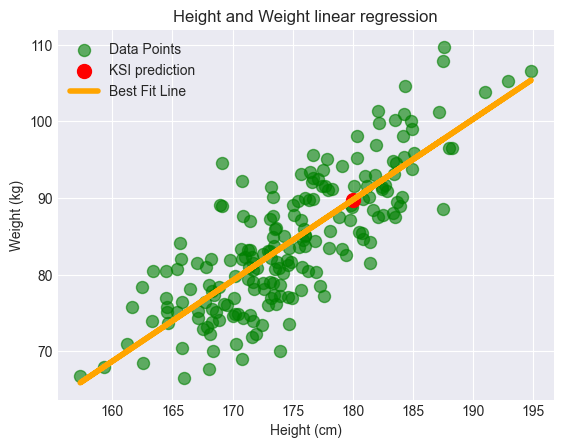

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
from sklearn import linear_model

def best_fit_line(xs,ys):
    slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    y_intercept = mean(ys) - slope * mean(xs)
    return slope, y_intercept

##load in dataframe and select a portion
df = pd.read_csv('weight-height.csv')
male_df = df[df['Gender'] == 'Male'][:200]

#data cleaning:
male_df['Height'] = male_df['Height'].apply(lambda x: x*2.54)
male_df['Weight'] = male_df['Weight'].apply(lambda x: x*0.45359237)

#convert height and weight columns to lists
height_list = male_df['Height'].tolist()
weight_list = male_df['Weight'].tolist()

#convert lists to numpy lists
xs = np.array(height_list, dtype=np.float64)
ys = np.array(weight_list, dtype=np.float64)


#1st method: using our own function

#calculated slope and y-intercept of the lists
slope, y_intercept = best_fit_line(xs,ys)

#get the regression line from the calculated slope and y-intercept
regression_line = [(slope * x) + y_intercept for x in xs]

#Making predictions
average_man_height = 175.26
average_man_weight = (slope * average_man_height) + y_intercept

#2nd method: using Python's sk-learn library

#Create linear regression object
height_weight = linear_model.LinearRegression()

#Train the model using the training sets
height_weight.fit(xs.reshape(-1,1),ys)

#get the regression line using the model
regression_line = height_weight.predict(xs.reshape(-1,1))

#Making predictions
KSI_height = 180
KSI_weight = height_weight.predict(np.array([[KSI_height]]))[0]

#Plot outputs and plot customization
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(xs,ys,label='Data Points', alpha=0.6,color='green',s=75)
plt.scatter(KSI_height,KSI_weight, label='KSI prediction',color='red',s=100)
plt.plot(xs,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('Height and Weight linear regression')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
